# Pylops - LSQR

### Author: M.Ravasi

In this notebook I compare scipy and pylops LSQR

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from scipy.sparse.linalg import lsqr as sp_lsqr
from pylops.basicoperators import *
from pylops.optimization.solver import lsqr, cgls

## LSQR with zero initial guess

 
LSQR            Least-squares solution of  Ax = b
The matrix A has 50 rows and 50 columns
damp = 1.00000000000000e-10   calc_var =        0
atol = 1.00e-10                 conlim = 1.00e+12
btol = 1.00e-10               iter_lim =       50
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   5.230e+01  5.230e+01    1.0e+00  1.8e-01
     1 -6.21093e-02   1.782e+01  1.782e+01    3.4e-01  7.6e-01   1.0e+01  1.0e+00
     2 -1.28763e-01   1.173e+01  1.173e+01    2.2e-01  4.1e-01   1.5e+01  2.1e+00
     3 -7.10023e-02   7.890e+00  7.890e+00    1.5e-01  3.3e-01   1.7e+01  3.5e+00
     4 -1.69290e-01   5.774e+00  5.774e+00    1.1e-01  2.7e-01   2.0e+01  5.0e+00
     5 -2.09896e-01   4.202e+00  4.202e+00    8.0e-02  2.0e-01   2.2e+01  6.7e+00
     6 -1.95727e-01   3.119e+00  3.119e+00    6.0e-02  1.8e-01   2.4e+01  8.4e+00
     7 -1.86787e-01   2.377e+00  2.377e+00    4.5e-02  1.7e-01   2.5e+01  1.0e+01
     8 -1.04244e-01   1.973e+00  1.973

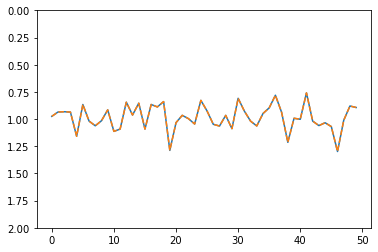

In [2]:
par = {'n': 50, 'm': 50, 'k': 14,
        'dtype': np.float64, 'sparse': False} # square

# Create random m-by-n encoding matrix
m = par['m']
n = par['n']
A = np.random.normal(0, 1, (m, n))
Aop = MatrixMult(A)
x = np.ones(n)
y = A.dot(x)

damp = 1e-10
atol = 1e-10
btol = 1e-10
conlim = 1e12
itn_max = 50
show = True

# Without initial guess
xinv_sp, istop_sp, itn_sp, r1norm_sp, r2norm_sp, anorm_sp, \
acond_sp, arnorm_sp, xnorm_sp, var_sp = \
    sp_lsqr(Aop, y, damp, atol, btol, conlim, itn_max, show)

xinv, istop, itn, r1norm, r2norm, anorm, acond, arnorm, xnorm, var, cost = \
    lsqr(Aop, y, np.zeros(n), damp, atol, btol, conlim, itn_max, True, show)

plt.figure()
plt.plot(xinv)
plt.plot(xinv_sp, '--')
plt.ylim(2, 0);

## LSQR with non-zero initial guess

 
LSQR            Least-squares solution of  Ax = b
The matrix A has 50 rows and 50 columns
damp = 1.00000000000000e-10   calc_var =        0
atol = 1.00e-10                 conlim = 1.00e+12
btol = 1.00e-10               iter_lim =      100
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0 -1.45816e-01   5.055e+01  5.055e+01    1.0e+00  1.7e-01
     1  1.98691e-01   2.673e+01  2.673e+01    5.2e-01  6.8e-01   1.0e+01  1.0e+00
     2  6.29537e-01   1.751e+01  1.751e+01    3.4e-01  4.3e-01   1.5e+01  2.2e+00
     3  1.18888e+00   1.201e+01  1.201e+01    2.3e-01  3.3e-01   1.8e+01  3.6e+00
     4  1.41303e+00   8.407e+00  8.407e+00    1.6e-01  2.8e-01   2.0e+01  5.2e+00
     5  1.43795e+00   6.359e+00  6.359e+00    1.2e-01  2.0e-01   2.3e+01  6.8e+00
     6  1.26251e+00   4.877e+00  4.877e+00    9.4e-02  1.7e-01   2.4e+01  8.5e+00
     7  1.27707e+00   4.145e+00  4.145e+00    8.0e-02  1.2e-01   2.6e+01  1.0e+01
     8  1.28547e+00   3.800e+00  3.800

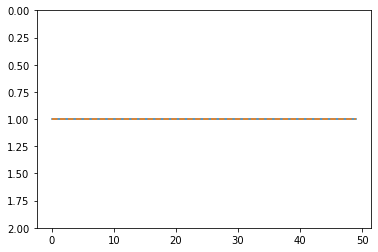

In [3]:
par = {'n': 50, 'm': 50, 'k': 14,
        'dtype': np.float64, 'sparse': False} # square

# Create random m-by-n encoding matrix
m = par['m']
n = par['n']
A = np.random.normal(0, 1, (m, n))
Aop = MatrixMult(A)
x = np.ones(n)
y = A.dot(x)

damp = 1e-10
atol = 1e-10
btol = 1e-10
conlim = 1e12
itn_max = 100
show = True

x0 = np.random.normal(0, 1, n)

# With initial guess
xinv_sp, istop_sp, itn_sp, r1norm_sp, r2norm_sp, anorm_sp, \
acond_sp, arnorm_sp, xnorm_sp, var_sp = \
sp_lsqr(Aop, y, damp, atol, btol, conlim, itn_max, show, x0=x0)
#    sp_lsqr(Aop, y - Aop * x0, damp, atol, btol, conlim, itn_max, show)
#xinv_sp += x0
xinv, istop, itn, r1norm, r2norm, anorm, acond, arnorm, xnorm, var, cost = \
    lsqr(Aop, y, x0, damp, atol, btol, conlim, itn_max, True, show)

plt.figure()
plt.plot(xinv)
plt.plot(xinv_sp, '--')
plt.ylim(2, 0);